In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np

In [4]:
ls /mnt/sda2/exp3_llj/

n1_les_wrfout_d01_20130302.nc  n2_wrfout_d01_20130302.nc
n1_les_wrfout_d02_20130302.nc  n2_wrfout_d02_20130302.nc
n1_les_wrfout_d03_20130302.nc  n2_wrfout_d03_20130302.nc
n1_wrfout_d01_20130302.nc      wrfout_d01_2013-03-02_00:00:00
n1_wrfout_d02_20130302.nc      wrfout_d02_2013-03-02_00:00:00
n1_wrfout_d03_20130302.nc      wrfout_d03_2013-03-02_00:00:00


In [5]:
model='n1_les'
run='les'
domain='d01'
print('/mnt/sda2/exp3_llj/'+model+'_wrfout_'+domain+'_20130302.nc')

/mnt/sda2/exp3_llj/n1_les_wrfout_d01_20130302.nc


In [6]:
wrflist = Dataset('/mnt/sda2/exp3_llj/'+model+'_wrfout_'+domain+'_20130302.nc')
uv, wdir = getvar(wrflist, "uvmet_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
tvv = getvar(wrflist, "tv", units="degC", timeidx=ALL_TIMES)
tvv.shape

(55, 31, 83, 83)

In [112]:
tvv[0,0,36,36];
#XLONG    float32 -103.773
#XLAT     float32 19.2801

In [7]:
wrftime = getvar(wrflist, "times", timeidx=ALL_TIMES)
utc2loc = np.timedelta64(6,'h')
wrftimes = pd.to_datetime(wrftime.values)-utc2loc
date1, date2 = wrftimes[0], wrftimes[wrftimes.size-1]
print(wrftimes.size, date1, date2)

55 2013-03-01 18:00:00 2013-03-04 00:00:00


In [8]:
# Interpolate levels
interp_levels = [.020, .030, .040, .050, .100, .150, .200,
                 .250, .300, .350]

interp_uv = vinterp(wrflist, field=uv, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, field_type='z')

interp_wdir = vinterp(wrflist, field=wdir, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, field_type="z")

interp_tv = vinterp(wrflist, field=tvv, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, field_type="z")

interp_uv.shape

(55, 10, 83, 83)

In [9]:
uv10, wdir10 = getvar(wrflist, "uvmet10_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
tv10 = getvar(wrflist, "tv", units="degC", timeidx=ALL_TIMES)

w50 = wrfuv[:,1].resample(Time="30Min").mean() 
t50 = wrftv[:,1].resample(Time="30Min").mean() 
w100 = wrfuv[:,2].resample(Time="30Min").mean() 
t100 = wrftv[:,2].resample(Time="30Min").mean() 
w150 = wrfuv[:,3].resample(Time="30Min").mean() 
t150 = wrftv[:,3].resample(Time="30Min").mean() 
w200 = wrfuv[:,4].resample(Time="30Min").mean() 
t200 = wrftv[:,4].resample(Time="30Min").mean() 
w250 = wrfuv[:,4].resample(Time="30Min").mean() 
t250 = wrftv[:,4].resample(Time="30Min").mean() 
w300 = wrfuv[:,5].resample(Time="30Min").mean() 
t300 = wrftv[:,5].resample(Time="30Min").mean() 


In [15]:
wrfuv = interp_uv[:,:,36,36];
wrfdd = interp_wdir[:,:,36,36];
wrftv = interp_tv[:,:,36,36];
dd = pd.read_pickle('sodar_dd.pk')
sp = pd.read_pickle('sodar_sp.pk')
tv = pd.read_pickle('sodar_tv.pk')

In [16]:
w50 = wrfuv[:,1]
t50 = wrftv[:,1]
w100 = wrfuv[:,2]
t100 = wrftv[:,2]
w150 = wrfuv[:,3]
t150 = wrftv[:,3]
w200 = wrfuv[:,4]
t200 = wrftv[:,4]
w250 = wrfuv[:,4]
t250 = wrftv[:,4]
w300 = wrfuv[:,5]
t300 = wrftv[:,5]

s50  = sp['spd_50' ]['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s100 = sp['spd_100']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s150 = sp['spd_150']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s200 = sp['spd_200']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s250 = sp['spd_250']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s300 = sp['spd_300']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s350 = sp['spd_350']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s400 = sp['spd_400']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s450 = sp['spd_450']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
s500 = sp['spd_500']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values

tv50  = tv['spd_50' ]['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv100 = tv['spd_100']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv150 = tv['spd_150']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv200 = tv['spd_200']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv250 = tv['spd_250']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv300 = tv['spd_300']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv350 = tv['spd_350']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv400 = tv['spd_400']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv450 = tv['spd_450']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
tv500 = tv['spd_500']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values

In [17]:
sp['spd_50']['2013-03-01 18:00':'2013-03-04 00:00'][::2].shape

(55,)

In [19]:
timelabel = wrftimes[:]
print(s50.shape, w50.shape, timelabel.shape)
print(timelabel[0], timelabel[54])

(55,) (55,) (55,)
2013-03-01 18:00:00 2013-03-04 00:00:00


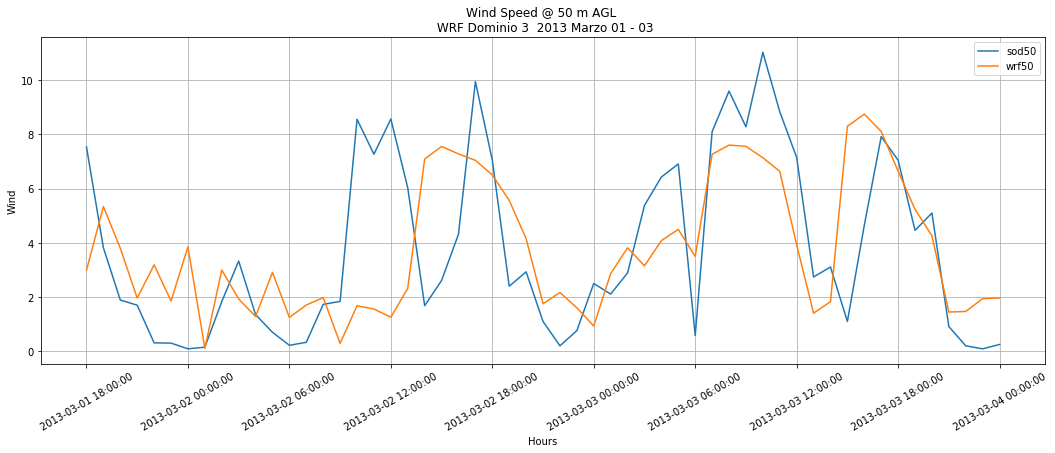

In [20]:
fig = plt.figure(figsize=[18,6])
s50 = sp['spd_50']['2013-03-01 18:00':'2013-03-04 00:00'][::2].values
plt.plot(s50, label='sod50')
plt.plot(w50, label='wrf50')

plt.title('Wind Speed @ 50 m AGL \n WRF Dominio 3  2013 Marzo 01 - 03')
plt.ylabel('Wind')
plt.xlabel('Hours')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
# xticks(locs, [labels], **kwargs) 
plt.xticks(np.arange(0,timelabel.size,6),timelabel[::6], rotation=30)
plt.show()

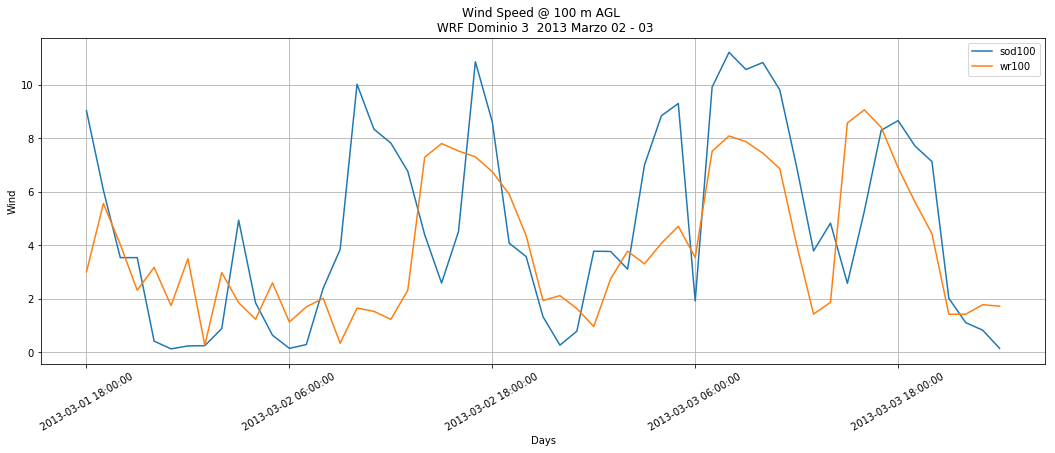

In [21]:
fig = plt.figure(figsize=[18,6])
plt.plot(s100, label='sod100')
plt.plot(w100, label='wr100')

plt.title('Wind Speed @ 100 m AGL \n WRF Dominio 3  2013 Marzo 02 - 03')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.show()

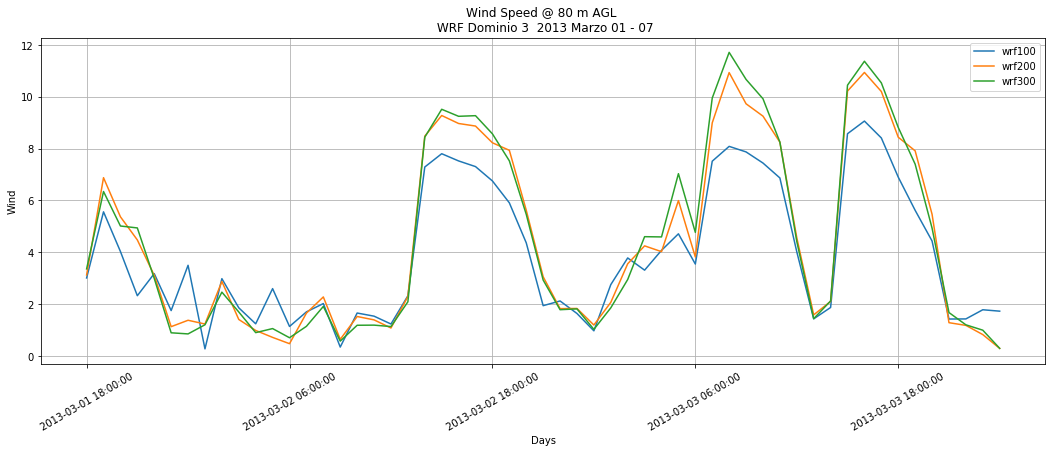

In [22]:
import pandas as pd
fig = plt.figure(figsize=[18,6])

plt.plot(w100, label='wrf100')
plt.plot(w200, label='wrf200')
plt.plot(w300, label='wrf300')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.show()

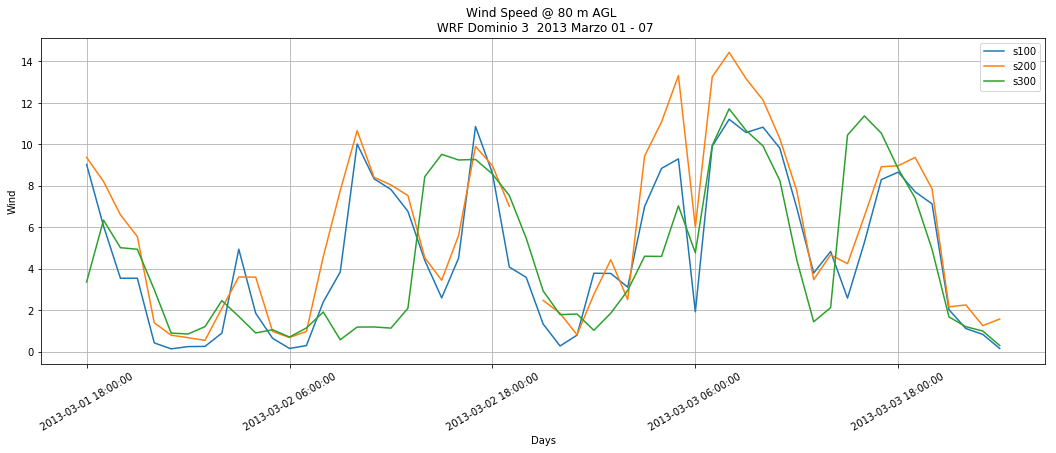

In [23]:
import pandas as pd
fig = plt.figure(figsize=[18,6])

plt.plot(s100, label='s100')
plt.plot(s200, label='s200')
plt.plot(w300, label='s300')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.show()

In [69]:
sodss = sp['2013-03-01 18:00':'2013-03-04 00:00'].T;
sodtv = tv['2013-03-01 18:00':'2013-03-04 00:00'].T;
sodtv;

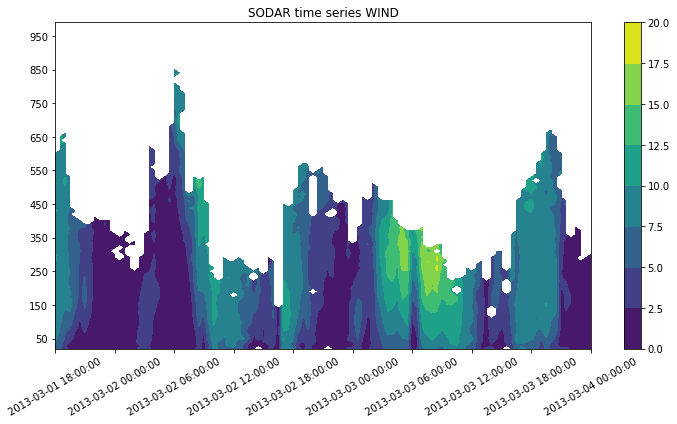

In [184]:
plt.figure(figsize=(12,6))
cont = plt.contourf(sodss)
plt.colorbar(cont)
plt.yticks(np.arange(3,98,10), np.arange(50,1001,100));
plt.xticks(np.arange(0,timelabel.size*2,12),timelabel[::6], rotation=30);
plt.title('SODAR time series WIND');

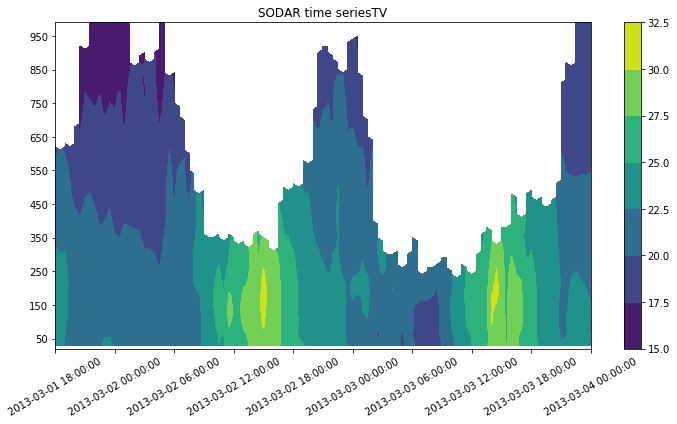

In [185]:
plt.figure(figsize=(12,6))
cont = plt.contourf(sodtv)
plt.colorbar(cont)
plt.yticks(np.arange(3,98,10), np.arange(50,1001,100));
plt.xticks(np.arange(0,timelabel.size*2,12),timelabel[::6], rotation=30);
plt.title('SODAR time seriesTV');

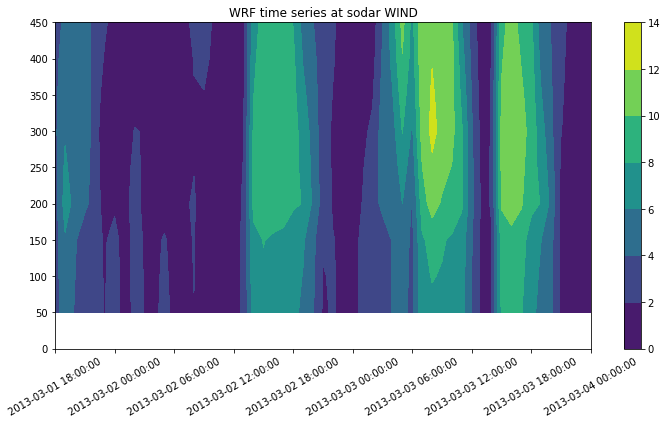

In [186]:
plt.figure(figsize=(12,6))
cont = plt.contourf(wrfuv.T)
plt.colorbar(cont)
plt.xticks(np.arange(0,timelabel.size,6),timelabel[::6], rotation=30);
plt.yticks(np.arange(0,10,1), np.arange(0,501,50));
plt.title('WRF time series at sodar WIND');

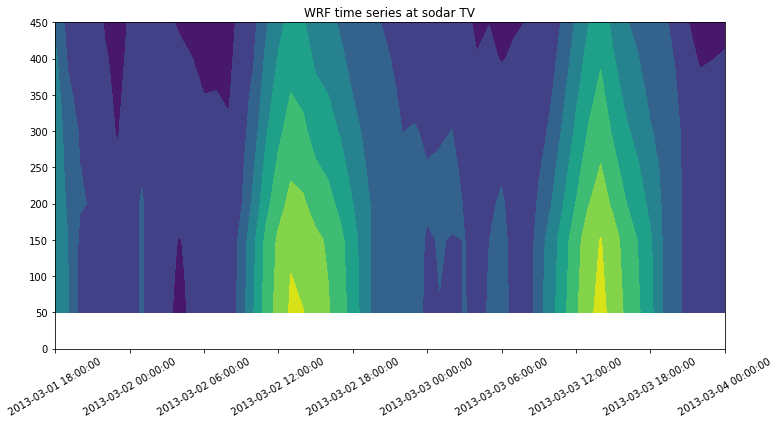

In [187]:
plt.figure(figsize=(12,6))
plt.contourf(wrftv.T)
plt.xticks(np.arange(0,timelabel.size,6),timelabel[::6], rotation=30);
plt.yticks(np.arange(0,10,1), np.arange(0,501,50));
plt.title('WRF time series at sodar TV');

In [135]:
lats = getvar(wrflist, "lat", timeidx=20)[:,0]
lons = getvar(wrflist, "lon", timeidx=20)[0,:]


numpy.datetime64('2013-03-02T20:00:00.000000000')

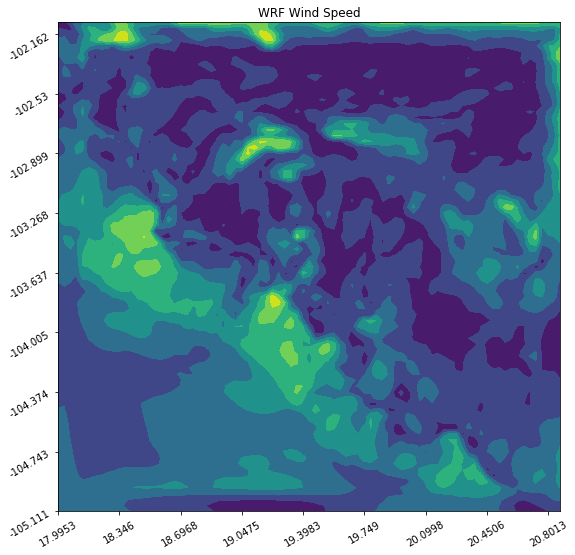

In [198]:
plt.figure(figsize=(9,9))
tt = 20
ll = 2
uvwrf, wdirwrf = getvar(wrflist, "uvmet_wspd_wdir", units="m s-1", timeidx=tt)
plt.contourf(uvwrf[ll,:,:])
plt.xticks(np.arange(0,84,10),lats[::10].values, rotation=30);
plt.yticks(np.arange(0,81,10), lons[::10].values, rotation=30);
plt.title('WRF Wind Speed');
wrftime = getvar(wrflist, "times", timeidx=tt)
wrftime.values

numpy.datetime64('2013-03-02T20:00:00.000000000')

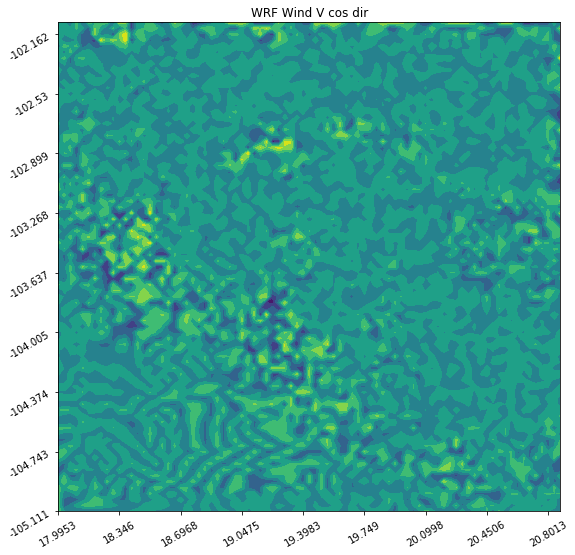

In [199]:
plt.figure(figsize=(9,9))
plt.contourf(uvwrf[ll,:,:]*np.cos(wdirwrf[ll,:,:]))
plt.xticks(np.arange(0,84,10),lats[::10].values, rotation=30);
plt.yticks(np.arange(0,81,10), lons[::10].values, rotation=30);
plt.title('WRF Wind V cos dir');
wrftime = getvar(wrflist, "times", timeidx=tt)
wrftime.values

numpy.datetime64('2013-03-02T20:00:00.000000000')

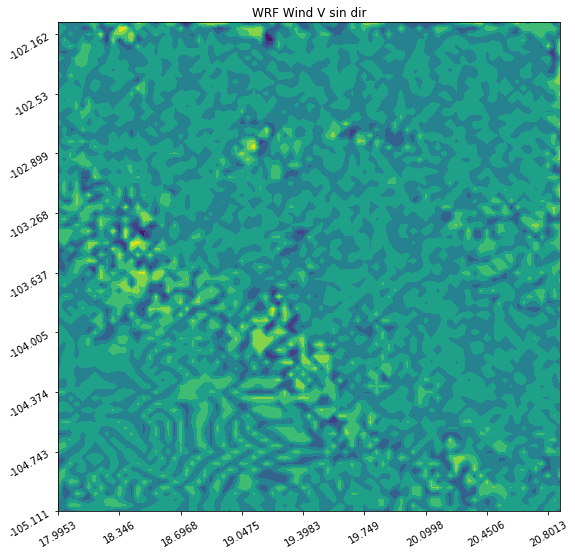

In [200]:
plt.figure(figsize=(9,9))
plt.contourf(uvwrf[ll,:,:]*np.sin(wdirwrf[ll,:,:]))
plt.xticks(np.arange(0,84,10),lats[::10].values, rotation=30);
plt.yticks(np.arange(0,81,10), lons[::10].values, rotation=30);
plt.title('WRF Wind V sin dir');
wrftime = getvar(wrflist, "times", timeidx=tt)
wrftime.values

numpy.datetime64('2013-03-02T20:00:00.000000000')

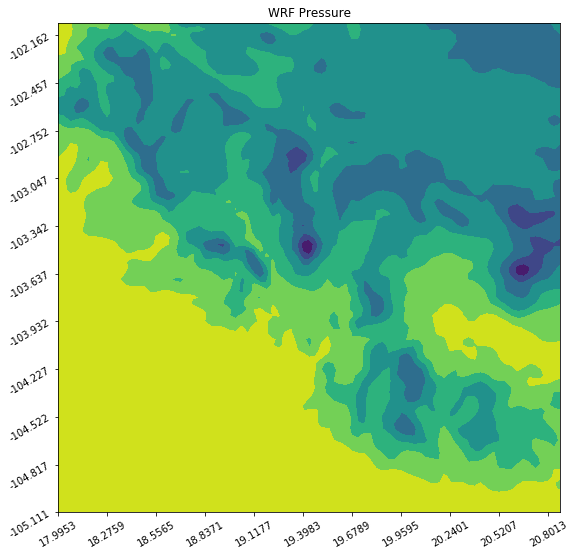

In [201]:
plt.figure(figsize=(9,9))
uvwrf = getvar(wrflist, "p", timeidx=tt)
plt.contourf(uvwrf[ll,:,:])
plt.xticks(np.arange(0,84,8),lats[::8].values, rotation=30);
plt.yticks(np.arange(0,81,8), lons[::8].values, rotation=30);
plt.title('WRF Pressure');
wrftime = getvar(wrflist, "times", timeidx=tt)
wrftime.values

import pandas as pd
timeArraySod=np.arange(np.datetime64('2012-08-16 00:30'), np.datetime64('2013-04-11 00:30')
                       ,np.timedelta64(30,'m'))
#Variables to store data temporarily #238 dias * 48dt = 11424 times (11424 lineas de los tiempos, 98 niveles)
#spd=(pd.read_csv('wind', header=None, low_memory=False)).values.reshape((11424, 98))
#drc=(pd.read_csv('direc', header=None, low_memory=False)).values.reshape((11424, 98))
vte=(pd.read_csv('temp', header=None, low_memory=False)).values.reshape((11424, 98))
#(11424 lineas de los tiempos, 98 niveles)
#spd[spd>99.9] = np.nan
#drc[drc>999 ] = np.nan
vte[vte>999 ] = np.nan
colNames=["spd_"+str((i+3)*10) for i in range(98)] 
import numpy.ma as ma
#spd = np.where(np.isnan(spd), ma.array(spd, mask=np.isnan(spd)).mean(axis=0), spd) 
#sp=pd.DataFrame(data=spd, index=timeArraySod, columns=colNames, dtype=None)
#dd=pd.DataFrame(data=drc, index=timeArraySod, columns=colNames, dtype=None)
tv=pd.DataFrame(data=vte, index=timeArraySod, columns=colNames, dtype=None)
tv.to_pickle('sodar_tv.pk')